In [ ]:
%pip install stable-baselines3[extra]

In [9]:
from stable_baselines3 import PPO
from environment import DroneLandingEnv
import matplotlib.pyplot as plt
import numpy as np

In [11]:
env = DroneLandingEnv()
model = PPO.load("ppo_drone_landing")

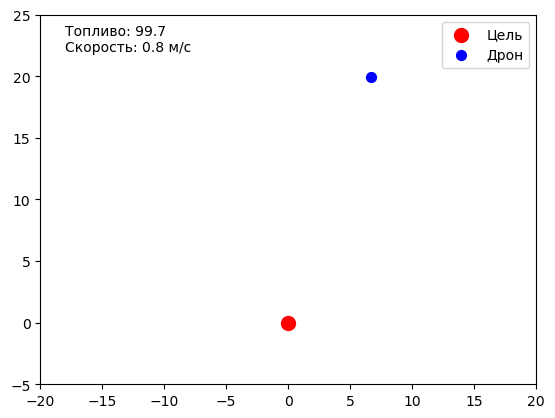

Эпизод завершён  на шаге 20, финальная награда: 104.41


In [12]:
# Сделаем тестовый запуск агента с визуализацией

obs, _ = env.reset()
rewards = []

for step in range(500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)
    rewards.append(reward)
    env.render()
    if terminated or truncated:
        print(f"Эпизод завершён  на шаге {step}, финальная награда: {sum(rewards):.2f}")
        break

env.close()

Агент не выполнил успешную посадку

In [13]:
# Попробуем запустить 10 эпизодов вручную

episode_rewards = []
for episode in range(10):
    obs, _ = env.reset()
    total_reward = 0
    for _ in range(500):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        if terminated or truncated:
            break
    episode_rewards.append(total_reward)
    print(f"Эпизод {episode+1}: награда = {total_reward:.2f}")

Эпизод 1: награда = 106.31
Эпизод 2: награда = 106.31
Эпизод 3: награда = 106.13
Эпизод 4: награда = 104.08
Эпизод 5: награда = 106.28
Эпизод 6: награда = 104.47
Эпизод 7: награда = 104.27
Эпизод 8: награда = 106.18
Эпизод 9: награда = 106.43
Эпизод 10: награда = 106.59


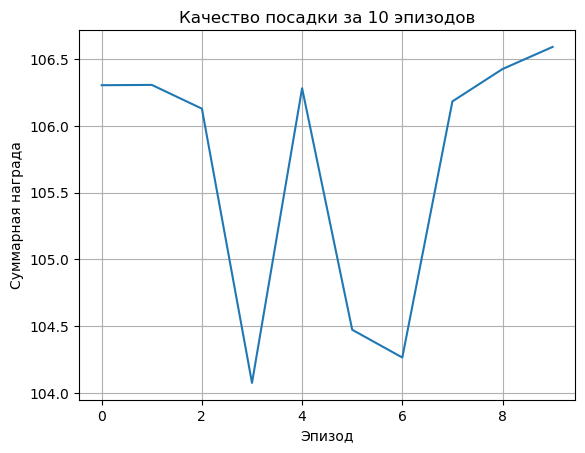

In [14]:
plt.plot(episode_rewards)
plt.xlabel("Эпизод")
plt.ylabel("Суммарная награда")
plt.title("Качество посадки за 10 эпизодов")
plt.grid(True)
plt.show()
